In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.grid_search import GridSearchCV
from sklearn import svm
from sklearn.manifold import TSNE
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation

##Keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Dropout, Flatten, Activation
from keras.callbacks import LearningRateScheduler
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
import keras.utils.visualize_util as vutil
from keras.optimizers import Adadelta, Adam, SGD, RMSprop, Adadelta
from keras.callbacks import LearningRateScheduler
from keras.utils.visualize_util import plot,model_to_dot
from keras.layers.convolutional import Convolution2D,MaxPooling2D,Convolution1D,MaxPooling1D
from IPython.display import SVG

%matplotlib inline  

Using Theano backend.
Using gpu device 0: Tesla M40 (CNMeM is disabled, cuDNN 5005)


In [2]:
genePD = pd.read_table("P50Gene.txt")

In [3]:
#genePD.iloc[:30,:]
genePD.shape

(70534, 75)

In [5]:
#genePD.head()

In [6]:
header = genePD.columns.values[7:]
geneLabel = np.zeros_like(header).astype(int)
print(type(header[0]))
print geneLabel.shape

<type 'str'>
(68,)


In [7]:
for i in range(header.shape[0]):
    if("P00" in header[i]):
        geneLabel[i]=1

In [8]:
#con = []
#for i in range(header.shape[0]):
#    con.append([header[i],geneLabel[i]])

In [9]:
#con[:10]

In [10]:
#con[-5:]

In [11]:
#genePD.iloc[:,7:]
genePD1 = genePD.iloc[:,7:]

In [12]:
pd.DataFrame(geneLabel).T.shape

(1, 68)

In [13]:
genePD1.head()

,10334_P0002-T1_(HTA-2_0).CEL.pimg,10335_P0004-T1_(HTA-2_0).CEL.pimg,10336_P0006-T1_(HTA-2_0).CEL.pimg,10337_P0008-T1_(HTA-2_0).CEL.pimg,10338_P0010-T1_(HTA-2_0).CEL.pimg,10339_P0011-T1_(HTA-2_0).CEL.pimg,10340_P0015-T1_(HTA-2_0).CEL.pimg,10341_P0017-T1_(HTA-2_0).CEL.pimg,10342_P0019-T1_(HTA-2_0).CEL.pimg,10343_P0020-T1_(HTA-2_0).CEL.pimg,10344_P0023-T1_(HTA-2_0).CEL.pimg,10345_P0024-T1_(HTA-2_0).CEL.pimg,10346_P0025-T1_(HTA-2_0).CEL.pimg,10347_P0027-T1_(HTA-2_0).CEL.pimg,10348_P0029-T1_(HTA-2_0).CEL.pimg,10349_P0030-T1_(HTA-2_0).CEL.pimg,10350_P0031-T1_(HTA-2_0).CEL.pimg,10351_P0032-T1_(HTA-2_0).CEL.pimg,10352_P0042-T1_(HTA-2_0).CEL.pimg,10353_P0044-T1_(HTA-2_0).CEL.pimg,
0,4.87136,4.78377,4.53131,4.61647,4.59979,4.69951,4.44912,4.73384,4.69539,4.85434,4.76349,4.44754,4.78389,4.86275,4.96451,4.66143,4.76177,4.63940,4.57855,5.16820,...
1,2.83152,2.54463,2.15487,2.21499,2.30246,2.19925,2.26428,2.31739,2.18415,3.16996,2.80937,2.23663,2.88632,2.53508,2.84542,2.62939,2.77089,2.49775,2.49123,2.96151,...
2,7.44357,7.57288,8.15854,9.23785,7.76936,8.39819,8.81647,8.00555,8.10353,5.09584,7.24615,8.82426,6.85516,7.08659,6.31959,7.82094,7.65633,8.75288,8.88902,5.50549,...
3,4.79338,4.52983,4.33860,4.08913,4.20969,4.26832,4.03489,4.51406,4.29894,4.74181,4.48198,4.00659,4.78036,4.34761,4.46845,4.34083,4.42759,4.39995,4.17632,4.70299,...
4,5.25525,5.12963,5.09532,5.16179,4.97679,5.10457,4.93976,5.20587,5.34848,5.33516,5.30964,4.96604,5.24186,4.98327,5.30314,5.08783,5.01474,5.31235,5.09411,5.22861,...


In [14]:
genePD2 = genePD1.T
print(genePD2.shape)

(68, 70534)


In [15]:
genePD2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
10334_P0002-T1_(HTA-2_0).CEL.pimg,4.87136,2.83152,7.44357,4.79338,5.25525,4.86576,2.83494,4.91114,3.90338,3.86068,5.52244,3.41357,1.08527,6.28080,2.15164,2.08403,4.16124,4.98600,2.52245,5.08710,...
10335_P0004-T1_(HTA-2_0).CEL.pimg,4.78377,2.54463,7.57288,4.52983,5.12963,4.74778,2.54434,4.58574,3.99433,3.54164,5.14009,3.27056,1.32740,5.86095,1.96600,1.85380,3.59303,5.17989,2.79534,5.25150,...
10336_P0006-T1_(HTA-2_0).CEL.pimg,4.53131,2.15487,8.15854,4.33860,5.09532,4.02288,2.22244,3.90208,3.71936,3.21449,5.10882,2.74734,1.27408,6.04253,1.93392,1.91717,3.56547,5.91583,1.50201,4.97899,...
10337_P0008-T1_(HTA-2_0).CEL.pimg,4.61647,2.21499,9.23785,4.08913,5.16179,4.29374,2.57431,4.13444,3.61667,3.30135,4.97830,2.92673,1.11526,6.22503,1.75350,1.91137,3.58365,5.83059,1.83321,4.65183,...
10338_P0010-T1_(HTA-2_0).CEL.pimg,4.59979,2.30246,7.76936,4.20969,4.97679,4.52618,1.94363,4.36768,3.50123,3.05553,5.26039,3.14082,1.54465,5.76144,1.71742,1.90399,3.99412,5.64458,1.96906,4.90701,...


In [16]:
#Splitting data into train and testing. 70% Training and 30% Testing..
X_train, X_test, Y_train, Y_test = train_test_split(genePD2, geneLabel, test_size=0.3, random_state=4)

In [17]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

((47, 70534), (21, 70534))
((47,), (21,))


In [18]:
X = genePD2.values
Y = geneLabel
print(X.shape, Y.shape)

((68, 70534), (68,))


In [19]:
num_folds = 10
num_instances = len(X)
seed = 7
test_size = 0.30
num_samples = 10

In [20]:
#Logistic Regression-sklearn
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
model = LogisticRegression()
loocv = cross_validation.LeaveOneOut(n=num_instances)
kfold = cross_validation.ShuffleSplit(n=num_instances, n_iter=num_samples, test_size=test_size, random_state=seed)
scoring = 'accuracy'
#scoring = 'roc_auc'
results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#results = cross_validation.cross_val_score(model, X, Y, cv=loocv)
#results = cross_validation.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f") % (results.mean())
#print("AUC: %.3f") % (results.mean())

Accuracy: 0.871


In [20]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print metrics.accuracy_score(Y_test, predicted)
print(matrix)
report = classification_report(Y_test, predicted)
print(report)

0.904761904762
[[ 5  2]
 [ 0 14]]
             precision    recall  f1-score   support

          0       1.00      0.71      0.83         7
          1       0.88      1.00      0.93        14

avg / total       0.92      0.90      0.90        21



In [21]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print metrics.accuracy_score(Y_test, predicted)
print(matrix)
report = classification_report(Y_test, predicted)
print(report)

0.761904761905
[[ 4  3]
 [ 2 12]]
             precision    recall  f1-score   support

          0       0.67      0.57      0.62         7
          1       0.80      0.86      0.83        14

avg / total       0.76      0.76      0.76        21



In [22]:
#Logistic Regression-sklearn
#logReg = LogisticRegression()
#logReg.fit(X_train.values,Y_train)
#Y_logPred = logReg.predict(X_test)
#print metrics.accuracy_score(Y_test.reshape(len(Y_test),1),Y_logPred)
#Confusion matrix of logistic regression
#conf = metrics.confusion_matrix(Y_test,Y_logPred)
#print conf

In [23]:
#Random Forest Classification
#randForest = RandomForestClassifier(n_estimators=100)
#randForest.fit(X_train,Y_train)
#Y_randForestPred = randForest.predict(X_test)
#print metrics.accuracy_score(Y_test,Y_randForestPred)
#Confusion matrix for randomforest
#conf2 = metrics.confusion_matrix(Y_test,Y_randForestPred)
#print conf2

In [24]:
##Deep Learning

In [25]:
#X_train, X_test, Y_train, Y_test = train_test_split(genePD2, geneLabel, test_size=0.3, random_state=4)

In [26]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
#encoded_Y
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)

# dropout in hidden layers with weight constraint
def create_model():
    # create model
    model = Sequential()
    #model.add(Dropout(0.2), input_shape=(70534,))
    #model.add(Dense(300, init= 'normal', activation= 'relu' ))
    model.add(Dense(300, input_dim=70534, init= 'normal' , activation= 'relu' ))
    model.add(Dropout(0.5))
    model.add(Dense(100, init= 'normal', activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, init= 'normal', activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, init= 'normal' , activation= 'sigmoid'))
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
    return model

np.random.seed(seed)
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(y=encoded_Y, n_folds=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 82.92% (16.92%)


In [27]:
create_model().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_41 (Dense)                 (None, 300)           21160500    dense_input_11[0][0]             
____________________________________________________________________________________________________
dropout_31 (Dropout)             (None, 300)           0           dense_41[0][0]                   
____________________________________________________________________________________________________
dense_42 (Dense)                 (None, 100)           30100       dropout_31[0][0]                 
____________________________________________________________________________________________________
dropout_32 (Dropout)             (None, 100)           0           dense_42[0][0]                   
___________________________________________________________________________________________

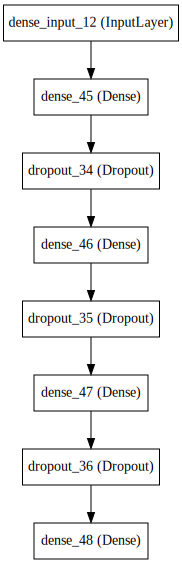

In [28]:
#create_model().get_config()
#SVG(vutil.to_graph(create_model(), recursive=True, show_shape=True).create(prog='dot', format="svg"))
#graph = to_graph(create_model(), show_shape=True)
#plot(create_model(),to_file='model.png')
SVG(model_to_dot(create_model()).create(prog='dot', format='svg'))

In [29]:
print(X.shape, Y.shape)

((68, 70534), (68,))


In [30]:
# learning rate schedule
def continous_decay(epoch): 
    return learning_rate / float(epoch)

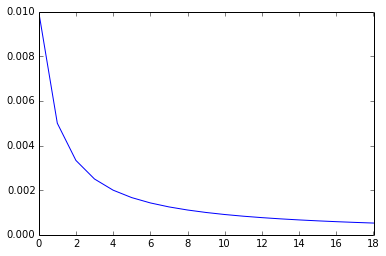

In [31]:
decay = []
learning_rate = 0.01
for i in range(1,20):
    decay.append(continous_decay(i))
plt.plot(decay)

In [32]:
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs #Continous 
#decay_rate = continous_decay
momentum = 0.8

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
#encoded_Y
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#adadelta = Adadelta(lr=learning_rate, decay=decay_rate)
# dropout in hidden layers with weight constraint
def create_model():
    # create model
    model = Sequential()
    #model.add(Dropout(0.2), input_shape=(70534,))
    #model.add(Dense(300, init= 'normal', activation= 'relu' ))
    model.add(Dense(300, input_dim=70534, init= 'normal' , activation= 'relu' ))
    model.add(Dropout(0.5))
    model.add(Dense(100, init= 'normal', activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, init= 'normal', activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, init= 'normal' , activation= 'sigmoid'))
    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'sgd' , metrics=['accuracy'])
    return model

np.random.seed(seed)
estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(y=encoded_Y, n_folds=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#print model.predict_classes(X, verbose=0)

Larger: 86.49% (8.90%)


In [35]:
# learning rate schedule, drop learning rate discrete instead of continous i.e. epoch 1-5,lr=0.1; epoch 5-10,lr=0.01
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

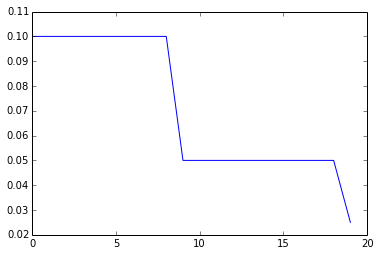

In [36]:
decay = []
for i in range(20):
    decay.append(step_decay(i))
plt.plot(decay)

In [44]:
# Compile model
epochs = 50
learning_rate = 0.1
#decay_rate = continous_decay
momentum = 0.8

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
#encoded_Y
# convert integers to dummy variables (i.e. one hot encoded)
#encoded_Y_one_hot = np_utils.to_categorical(encoded_Y)

#adadelta = Adadelta(lr=learning_rate, decay=decay_rate)
# dropout in hidden layers with weight constraint
def create_model():
    # create model
    model = Sequential()
    #model.add(Dropout(0.2), input_shape=(70534,))
    #model.add(Dense(300, init= 'normal', activation= 'relu' ))
    model.add(Dense(1000, input_dim=70534, init= 'normal', activation= 'relu'))
    #model.add(Dense(300, input_shape=(70534,), init= 'normal' , activation= 'relu' ))
    #model.add(Dense(300, input_dim=70534, init= 'normal' , activation= 'relu' ))
    #model.add(Dropout(0.5))
    model.add(Dense(100, init= 'normal', activation= 'relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(20, init= 'normal', activation= 'relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(1, init= 'normal' , activation= 'sigmoid'))    
    return model

model = create_model()
# Compile model
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer='adam', class_mode='categorical', metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
hist = model.fit(X, encoded_Y, validation_split=0.30, nb_epoch=50, batch_size=5, 
          callbacks=callbacks_list, verbose=2) 

#score = model.evaluate(X_test4.as_matrix(), Y_test, show_accuracy=True, verbose=0)

Train on 47 samples, validate on 21 samples
Epoch 1/50
0s - loss: 14.1147 - acc: 0.1064 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 3/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 4/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 5/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 6/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 7/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 8/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 9/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 10/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 11/50
0s - loss: 15.4322 - acc: 0.0426 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 12/50
0s - lo

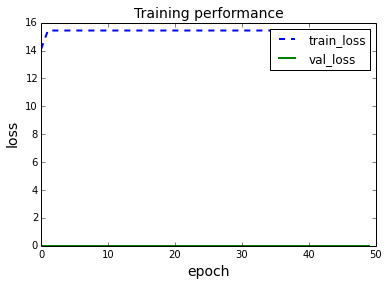

In [55]:
plt.figure()
plt.title('Training performance',fontsize=14)
plt.plot(hist.epoch, hist.history['loss'],'--', label='train_loss', lw=2)
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss', lw=2)
plt.legend()
plt.xlabel('epoch', fontsize=14)
plt.ylabel('loss', fontsize=14)

In [40]:
print X.shape
X_ = X.reshape(68,70534,1)

(68, 70534)


In [52]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=seed)
print(X_train_1.shape, X_test_1.shape)

((47, 70534), (21, 70534))


In [53]:
X_train_2 = X_train_1.reshape(47,70534,1)
X_test_2 = X_test_1.reshape(21,70534,1)

In [57]:
#1D CNN

# 1D conv

# set parameters:
batch_size = 5
input_length = X.shape[1]
nb_epoch = 10
nb_classes = 2

seed = 7
np.random.seed(seed)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
#encoded_Y
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)

Y_train_2 = np_utils.to_categorical(Y_train_1)
Y_test_2  = np_utils.to_categorical(Y_test_1)

print('Build model...')

model = Sequential()

model.add(Convolution1D(nb_filter=64,
                        filter_length=3,
                        border_mode='valid',
                        activation='relu',
                        input_dim=1, 
                        input_length=input_length)) 
                       
model.add(Convolution1D(nb_filter=32,
                        filter_length=3,
                        border_mode='valid',
                        activation='relu'))
                        
model.add(MaxPooling1D(pool_length=2))

model.add(Convolution1D(nb_filter=16,
                        filter_length=3,
                        border_mode='valid',
                        activation='relu'))

model.add(Convolution1D(nb_filter=16,
                        filter_length=3,
                        border_mode='same',
                        activation='relu'))

model.add(MaxPooling1D(pool_length=2))

# Adding GRU layer 
#model.add(GRU(output_dim=14))
#model.add(Activation('relu'))

#print_layers_shapes(model)

model.add(Flatten())

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(nb_classes)) 
#model.add(Dense(1)) 
model.add(Activation('sigmoid'))

#print_layers_shapes(model)

rms = RMSprop()
model.compile(loss='binary_crossentropy', optimizer=rms, class_mode='categorical', metrics=['accuracy'])

print('Train...')
history = model.fit(X_train_2, Y_train_2, batch_size=batch_size, 
                    nb_epoch=nb_epoch, show_accuracy=True, validation_data=(X_test_2, Y_test_2),verbose=2)

score, acc = model.evaluate(X_test_2, Y_test_2, batch_size=batch_size, show_accuracy=True)

#print('Test accuracy:', acc)
#print('Test score:', score)

Build model...
Train...
Train on 47 samples, validate on 21 samples
Epoch 1/10
0s - loss: 0.6498 - acc: 0.7447 - val_loss: 0.7561 - val_acc: 0.3333
Epoch 2/10
0s - loss: 0.6321 - acc: 0.7234 - val_loss: 0.8740 - val_acc: 0.3333
Epoch 3/10
0s - loss: 0.5756 - acc: 0.7234 - val_loss: 3.2483 - val_acc: 0.3333
Epoch 4/10
0s - loss: 0.5220 - acc: 0.7660 - val_loss: 0.6508 - val_acc: 0.7619
Epoch 5/10
0s - loss: 0.5329 - acc: 0.7234 - val_loss: 2.1304 - val_acc: 0.3333
Epoch 6/10
0s - loss: 0.5676 - acc: 0.7234 - val_loss: 8.5216 - val_acc: 0.3333
Epoch 7/10
0s - loss: 0.5456 - acc: 0.8085 - val_loss: 0.6394 - val_acc: 0.6667
Epoch 8/10
0s - loss: 0.6488 - acc: 0.7234 - val_loss: 0.5930 - val_acc: 0.7143
Epoch 9/10
0s - loss: 0.4348 - acc: 0.8723 - val_loss: 0.7836 - val_acc: 0.6667
Epoch 10/10
0s - loss: 0.4295 - acc: 0.8723 - val_loss: 0.6639 - val_acc: 0.8571
20/21 [===========================>..] - ETA: 0s

In [58]:
model.predict_classes(X_test_2, verbose=0)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])